In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator



In [ ]:
strong_data = pd.read_csv("strong.csv")
strong_data.columns
strong_data = strong_data.drop(columns=['Workout Name', 'Duration', 'Set Order', 'Seconds', 'Notes', 'Workout Notes', 'RPE'])
strong_data['Date'].dtype

In [238]:
strong_data['Date'] = (strong_data['Date'].astype(str).str.replace("-",""))
sorted_strong_data = strong_data.sort_values(by=['Exercise Name'])
exercise_and_count = pd.DataFrame(sorted_strong_data['Exercise Name'].value_counts()).reset_index()
#exercise_and_count


In [215]:
# groups excercise by exercise name
exercise_dfs = {Exercise_name: df for Exercise_name, df in sorted_strong_data.groupby("Exercise Name")}
exercise_dfs_date = {}

In [217]:
date_dfs = {}
whisker_plot = {}
whisker_plot = defaultdict(list)

# Loop through exercises (each key corresponds to an exercise name)
for exercise_name, exercise_df in exercise_dfs.items():
    #print(f"{exercise_name}:")  # Print exercise name

    # Group each exercise DataFrame by "Date"
    date_dfs[exercise_name] = {date: df for date, df in exercise_df.groupby("Date")}

    for date, df in date_dfs[exercise_name].items():
        #print(f"    {date}: {(df['Weight'])}")  # Print the date and number of rows for each group
        whisker_plot[exercise_name].append({int(date) : (df['Weight'].tolist())})


In [231]:
whisker_plot = dict(whisker_plot)


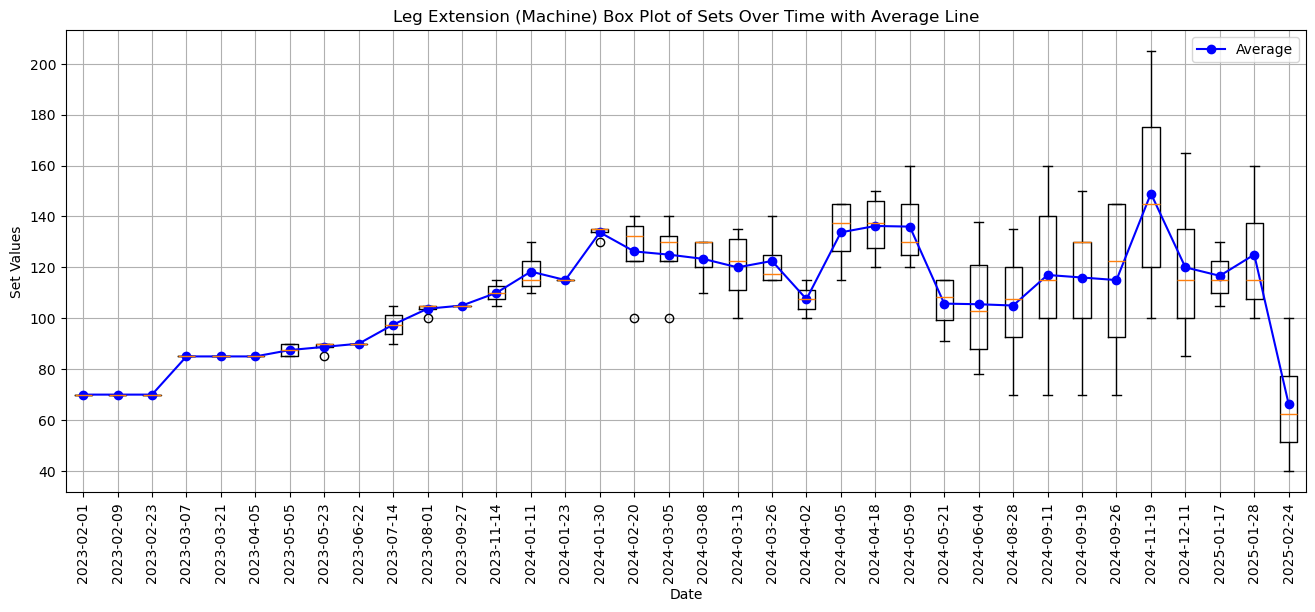

In [239]:
# Set the exercise name
exercise_name = 'Leg Extension (Machine)'

# Prepare data for plotting
dates = []
values = []
averages = []

# Loop through the data to collect dates, values, and calculate averages
for date_data in whisker_plot[exercise_name]:
    for date_key, value in date_data.items():
        # Append the date to the list
        dates.append(datetime.strptime(str(date_key), '%Y%m%d'))
        # Append the values to the list
        values.append(value)
        # Calculate the average of the values and append it to the averages list
        averages.append(np.mean(value))

# Check if both lists are populated before plotting
if dates and values:
    # Convert dates to Matplotlib's internal date format
    dates_num = mdates.date2num(dates)

    # Plotting with a wider figure
    plt.figure(figsize=(16, 6))  # Increased width for the plot

    # Use plt.boxplot() to create a box plot for each set of values
    plt.boxplot(values, positions=range(len(dates)))

    # Plot the line graph for the averages
    plt.plot(range(len(dates)), averages, marker='o', linestyle='-', color='b', label='Average')

    # Set the x-axis to display the dates correctly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # Add more ticks with a specific interval
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Ticks every 3 days
    # Alternatively, use MaxNLocator for finer control
    # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))  # Set a maximum of 15 ticks
    plt.xticks(range(len(dates)), [mdates.DateFormatter('%Y-%m-%d').__call__(d) for d in dates_num], rotation=90)


    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', steps=[1, 2, 5, 10]))

    # Title and labels
    plt.title(f'{exercise_name} Box Plot of Sets Over Time with Average Line')
    plt.xlabel('Date')
    plt.ylabel('Set Values')

    # Display the legend for the average line
    plt.grid(True)

    plt.legend()

    plt.show()
else:

    print("Error: Dates or values lists are empty.")